In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.matplotlib import rasterplot

## Nengo Quickstart 
- Represent Information as real numbers/ vectors
- N neurons in population form distributed representation for k-dimensional real-vector. The *activity* of the neurons is the actual state of their voltages while the *value* is some vector they represent. More neurons are more accurate representations of value. 
- Encoding Process $E: \mathbb R^N \rightarrow \mathbb R^k$ relies on *direction vector* $e_i$
$$\hat{x} = \sum a_i d_i$$
- Decoding Process $D: \mathbb R^k \rightarrow \mathbb R^N$
$$a_i = G(\alpha_i e_i \cdot x + b_i)$$

G represents any non-linearity for a model of the brain. By default, Nengo uses Integrate and Fire neurons, but can also be LIF, sigmoidal neurons, or something more complex. 


Some details/ resources
- [Forums](https://forum.nengo.ai/t/basic-concept-of-essemble-and-connection/2080) on encoding/decoding

In [56]:
net = nengo.Network()

In [57]:
N = 10
k = 2
with net:
    stim = nengo.Node(output=[0.5, 0.8])
    A = nengo.Ensemble(n_neurons=N, dimensions=k)
    B = nengo.Ensemble(n_neurons=N, dimensions=k)
    nengo.Connection(stim, A)
    probe = nengo.Probe(my_ensemble, synapse=0.01)

In [58]:
sim = nengo.Simulator(net)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

BuildError: Building <Connection from <Ensemble (unlabeled) at 0x146b34f10> to <Probe of 'decoded_output' of <Ensemble (unlabeled) at 0x146b34f10>>>: the 'pre' object <Ensemble (unlabeled) at 0x146b34f10> is not in the model, or has a size of zero.

In [49]:
sim.run(3.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [53]:
list(sim.data.keys())

[<Ensemble (unlabeled) at 0x146b34f10>,
 <Node (unlabeled) at 0x146adc850>,
 <Connection at 0x1469f9410 from <Node (unlabeled) at 0x146adc850> to <Ensemble (unlabeled) at 0x146b34f10>>,
 <Connection at 0x146b77c90 from <Ensemble (unlabeled) at 0x146b34f10> to <Probe of 'decoded_output' of <Ensemble (unlabeled) at 0x146b34f10>>>,
 <Probe at 0x146acc950 of 'decoded_output' of <Ensemble (unlabeled) at 0x146b34f10>>,
 <Network (unlabeled) at 0x146bc07d0>]

In [54]:
sim.data[probe].shape

KeyError: <Probe at 0x1469f11d0 of 'decoded_output' of <Ensemble (unlabeled) at 0x146b34f10>>

In [52]:
plt.plot(sim.data[probe][-10:,1])

KeyError: <Probe at 0x1469f11d0 of 'decoded_output' of <Ensemble (unlabeled) at 0x146b34f10>>

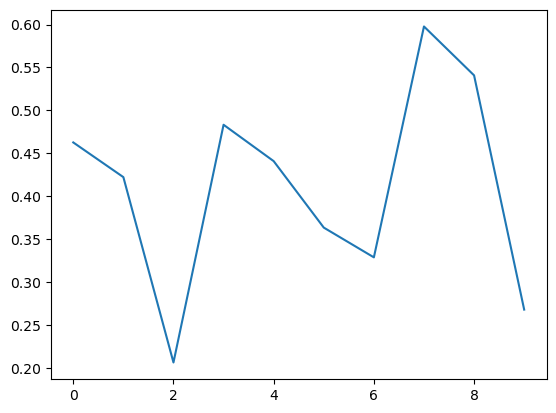

In [43]:
plt.plot(sim.data[probe][-10:,0])

## Honing in on Neural Representation - Example Gallery



### [Single Neuron Example](https://www.nengo.ai/nengo/examples/basic/single-neuron.html)

LIF Neuron

$C_m \dfrac{dV}{dt} = - g_L (V - E_L) + I$

In [18]:
from nengo.dists import Uniform

single_neuron_model = nengo.Network(label="A Single Neuron")

with single_neuron_model:
    neuron = nengo.Ensemble(
        1,
        dimensions=1,  # Represent a scalar
        # Set intercept to 0.5
        intercepts=Uniform(-0.5, -0.5),
        # Set the maximum firing rate of the neuron to 100hz
        max_rates=Uniform(100, 100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1]],
        label='single_neuron'
    )

    cos_input = nengo.Node(lambda t: np.cos(8 * t), label='cos_input')
    nengo.Connection(cos_input, neuron)

    cos_probe = nengo.Probe(cos_input)
    # The raw spikes from the neuron
    spikes = nengo.Probe(neuron.neurons)
    # Subthreshold soma voltage of the neuron
    voltage = nengo.Probe(neuron.neurons, "voltage")
    # Spikes filtered by a 10ms post-synaptic filter
    filtered = nengo.Probe(neuron, synapse=0.01)


In [19]:
with nengo.Simulator(single_neuron_model) as sim:  # Create the simulator
    sim.run(2)  # Run it for 1 second

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [20]:
for key in list(sim.data):
    print(key)

<Ensemble 'single_neuron'>
<Node 'cos_input'>
<Connection from <Node 'cos_input'> to <Ensemble 'single_neuron'>>
<Probe of 'output' of <Node 'cos_input'>>
<Probe of 'output' of <Neurons of <Ensemble 'single_neuron'>>>
<Probe of 'voltage' of <Neurons of <Ensemble 'single_neuron'>>>
<Connection from <Ensemble 'single_neuron'> to <Probe of 'decoded_output' of <Ensemble 'single_neuron'>>>
<Probe of 'decoded_output' of <Ensemble 'single_neuron'>>
<Network "A Single Neuron">


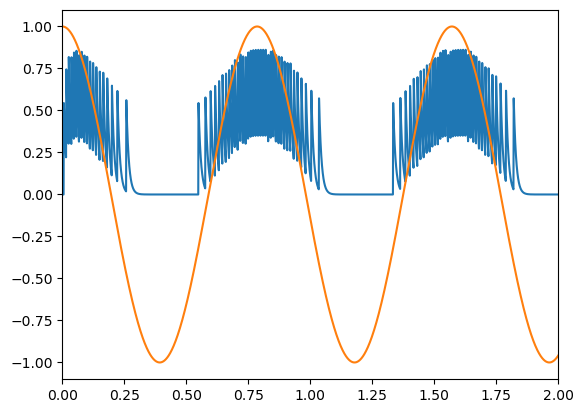

In [23]:
# Plot the decoded output of the ensemble
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[cos_probe])
plt.xlim(0, 2)
plt.show()

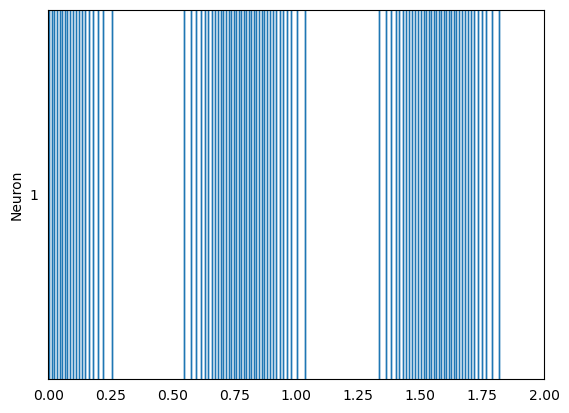

In [25]:
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlim(0, 2)
plt.show()

In [31]:
neuron.neurons

<Neurons at 0x126a8b850 of <Ensemble 'single_neuron' at 0x1266a7c50>>